<a href="https://colab.research.google.com/github/christophersingh/Taxi-Time-Series/blob/main/New_York_Green_Taxi_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

df = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2016-02.csv?raw=true')
df

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2016-02-01 00:00:01,2016-02-01 00:10:06,N,1,-73.939018,40.805214,-73.972534,40.785885,1,2.86,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1.0
1,2,2016-02-01 00:01:33,2016-02-01 00:20:13,N,1,-73.891495,40.746651,-73.890877,40.743896,1,3.35,13.0,0.5,0.5,0.00,0.0,NaN,0.3,14.30,2,1.0
2,2,2016-02-01 00:03:46,2016-02-01 00:21:04,N,1,-73.983780,40.676132,-73.956978,40.718327,1,4.70,17.5,0.5,0.5,3.76,0.0,NaN,0.3,22.56,1,1.0
3,2,2016-02-01 00:00:05,2016-02-01 00:06:48,N,1,-73.807518,40.700375,-73.831657,40.705978,1,2.11,8.0,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2,1.0
4,2,2016-02-01 00:06:20,2016-02-01 00:08:47,N,1,-73.903961,40.744934,-73.900009,40.733601,5,0.98,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510717,1,2016-02-29 23:00:49,2016-02-29 23:17:52,N,5,-73.867195,40.752384,-73.877914,40.756538,2,2.10,8.0,0.0,0.0,0.00,0.0,NaN,0.0,8.00,2,2.0
1510718,1,2016-02-29 23:00:46,2016-02-29 23:10:08,N,1,-73.916656,40.757957,-73.881950,40.755867,1,1.90,9.0,0.5,0.5,0.00,0.0,NaN,0.3,10.30,2,1.0
1510719,1,2016-02-29 23:00:17,2016-02-29 23:15:02,N,1,-73.979424,40.688305,-73.923569,40.698891,1,3.30,13.0,0.5,0.5,3.55,0.0,NaN,0.3,17.85,1,1.0
1510720,1,2016-02-29 23:00:02,2016-02-29 23:06:22,N,1,-73.987488,40.702381,-73.995041,40.719868,1,2.20,8.5,0.5,0.5,2.90,0.0,NaN,0.3,12.70,1,1.0


In [2]:
original_observations, original_columns = df.shape
original_observations, original_columns

(1510722, 21)

Number of Rows: 1510722

Number of Columns: 21

In [3]:
df.isnull().sum()

VendorID                       0
lpep_pickup_datetime           0
Lpep_dropoff_datetime          0
Store_and_fwd_flag             0
RateCodeID                     0
Pickup_longitude               0
Pickup_latitude                0
Dropoff_longitude              0
Dropoff_latitude               0
Passenger_count                0
Trip_distance                  0
Fare_amount                    0
Extra                          0
MTA_tax                        0
Tip_amount                     0
Tolls_amount                   0
Ehail_fee                1510722
improvement_surcharge          0
Total_amount                   0
Payment_type                   0
Trip_type                      2
dtype: int64

In [4]:
df.drop(['Ehail_fee'], inplace=True, axis=1)
df.dropna(inplace=True)
df

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2016-02-01 00:00:01,2016-02-01 00:10:06,N,1,-73.939018,40.805214,-73.972534,40.785885,1,2.86,10.5,0.5,0.5,0.00,0.0,0.3,11.80,2,1.0
1,2,2016-02-01 00:01:33,2016-02-01 00:20:13,N,1,-73.891495,40.746651,-73.890877,40.743896,1,3.35,13.0,0.5,0.5,0.00,0.0,0.3,14.30,2,1.0
2,2,2016-02-01 00:03:46,2016-02-01 00:21:04,N,1,-73.983780,40.676132,-73.956978,40.718327,1,4.70,17.5,0.5,0.5,3.76,0.0,0.3,22.56,1,1.0
3,2,2016-02-01 00:00:05,2016-02-01 00:06:48,N,1,-73.807518,40.700375,-73.831657,40.705978,1,2.11,8.0,0.5,0.5,0.00,0.0,0.3,9.30,2,1.0
4,2,2016-02-01 00:06:20,2016-02-01 00:08:47,N,1,-73.903961,40.744934,-73.900009,40.733601,5,0.98,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510717,1,2016-02-29 23:00:49,2016-02-29 23:17:52,N,5,-73.867195,40.752384,-73.877914,40.756538,2,2.10,8.0,0.0,0.0,0.00,0.0,0.0,8.00,2,2.0
1510718,1,2016-02-29 23:00:46,2016-02-29 23:10:08,N,1,-73.916656,40.757957,-73.881950,40.755867,1,1.90,9.0,0.5,0.5,0.00,0.0,0.3,10.30,2,1.0
1510719,1,2016-02-29 23:00:17,2016-02-29 23:15:02,N,1,-73.979424,40.688305,-73.923569,40.698891,1,3.30,13.0,0.5,0.5,3.55,0.0,0.3,17.85,1,1.0
1510720,1,2016-02-29 23:00:02,2016-02-29 23:06:22,N,1,-73.987488,40.702381,-73.995041,40.719868,1,2.20,8.5,0.5,0.5,2.90,0.0,0.3,12.70,1,1.0


In [5]:
df.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.510720e+06,1.510720e+06,1.510720e+06,1.510720e+06,1.510720e+06,1.510720e+06,1.510720e+06,1.510720e+06,1.510720e+06,1.510720e+06,1.510720e+06,1.510720e+06,1.510720e+06,1.510720e+06,1.510720e+06,1.510720e+06,1.510720e+06
mean,1.785150e+00,1.091200e+00,-7.381939e+01,4.067786e+01,-7.382846e+01,4.068169e+01,1.352400e+00,2.733120e+00,1.174857e+01,3.498228e-01,4.869599e-01,1.225784e+00,1.017320e-01,2.921850e-01,1.420500e+01,1.508750e+00,1.021434e+00
std,4.107183e-01,6.033685e-01,3.099863e+00,1.680436e+00,2.973413e+00,1.609811e+00,1.019621e+00,2.844410e+00,9.397575e+00,3.818639e-01,8.789878e-02,2.425731e+00,1.357323e+00,5.129266e-02,1.087969e+01,5.255724e-01,1.448266e-01
min,1.000000e+00,1.000000e+00,-1.152825e+02,0.000000e+00,-1.153322e+02,0.000000e+00,0.000000e+00,0.000000e+00,-4.000000e+02,-4.500000e+00,-5.000000e-01,-1.000000e+01,-1.250000e+01,-3.000000e-01,-4.000000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.396089e+01,4.069459e+01,-7.396796e+01,4.069611e+01,1.000000e+00,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,7.800000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394675e+01,4.074654e+01,-7.394559e+01,4.074694e+01,1.000000e+00,1.800000e+00,9.000000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.100000e+01,1.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391901e+01,4.080243e+01,-7.391279e+01,4.079215e+01,1.000000e+00,3.440000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.716000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.232435e+01,0.000000e+00,4.232436e+01,9.000000e+00,2.355000e+02,9.335000e+02,4.500000e+00,3.000000e+00,4.000000e+02,9.021700e+02,1.770000e+00,1.121160e+03,5.000000e+00,2.000000e+00


Drop records with (0,0) as latitude or longitude

In [6]:
df = df.loc[(df["Pickup_longitude"] != 0) & (df["Pickup_latitude"] != 0) & (df["Dropoff_longitude"] != 0) & (df["Dropoff_latitude"] != 0) ]
df

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2016-02-01 00:00:01,2016-02-01 00:10:06,N,1,-73.939018,40.805214,-73.972534,40.785885,1,2.86,10.5,0.5,0.5,0.00,0.0,0.3,11.80,2,1.0
1,2,2016-02-01 00:01:33,2016-02-01 00:20:13,N,1,-73.891495,40.746651,-73.890877,40.743896,1,3.35,13.0,0.5,0.5,0.00,0.0,0.3,14.30,2,1.0
2,2,2016-02-01 00:03:46,2016-02-01 00:21:04,N,1,-73.983780,40.676132,-73.956978,40.718327,1,4.70,17.5,0.5,0.5,3.76,0.0,0.3,22.56,1,1.0
3,2,2016-02-01 00:00:05,2016-02-01 00:06:48,N,1,-73.807518,40.700375,-73.831657,40.705978,1,2.11,8.0,0.5,0.5,0.00,0.0,0.3,9.30,2,1.0
4,2,2016-02-01 00:06:20,2016-02-01 00:08:47,N,1,-73.903961,40.744934,-73.900009,40.733601,5,0.98,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510717,1,2016-02-29 23:00:49,2016-02-29 23:17:52,N,5,-73.867195,40.752384,-73.877914,40.756538,2,2.10,8.0,0.0,0.0,0.00,0.0,0.0,8.00,2,2.0
1510718,1,2016-02-29 23:00:46,2016-02-29 23:10:08,N,1,-73.916656,40.757957,-73.881950,40.755867,1,1.90,9.0,0.5,0.5,0.00,0.0,0.3,10.30,2,1.0
1510719,1,2016-02-29 23:00:17,2016-02-29 23:15:02,N,1,-73.979424,40.688305,-73.923569,40.698891,1,3.30,13.0,0.5,0.5,3.55,0.0,0.3,17.85,1,1.0
1510720,1,2016-02-29 23:00:02,2016-02-29 23:06:22,N,1,-73.987488,40.702381,-73.995041,40.719868,1,2.20,8.5,0.5,0.5,2.90,0.0,0.3,12.70,1,1.0


Drop records where there are no passengers and where total ride amount is less than or equal to 0 (essentially a free ride)

In [7]:
df = df.loc[(df['Passenger_count'] > 0) & (df['Total_amount'] > 0)]
df

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2016-02-01 00:00:01,2016-02-01 00:10:06,N,1,-73.939018,40.805214,-73.972534,40.785885,1,2.86,10.5,0.5,0.5,0.00,0.0,0.3,11.80,2,1.0
1,2,2016-02-01 00:01:33,2016-02-01 00:20:13,N,1,-73.891495,40.746651,-73.890877,40.743896,1,3.35,13.0,0.5,0.5,0.00,0.0,0.3,14.30,2,1.0
2,2,2016-02-01 00:03:46,2016-02-01 00:21:04,N,1,-73.983780,40.676132,-73.956978,40.718327,1,4.70,17.5,0.5,0.5,3.76,0.0,0.3,22.56,1,1.0
3,2,2016-02-01 00:00:05,2016-02-01 00:06:48,N,1,-73.807518,40.700375,-73.831657,40.705978,1,2.11,8.0,0.5,0.5,0.00,0.0,0.3,9.30,2,1.0
4,2,2016-02-01 00:06:20,2016-02-01 00:08:47,N,1,-73.903961,40.744934,-73.900009,40.733601,5,0.98,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510717,1,2016-02-29 23:00:49,2016-02-29 23:17:52,N,5,-73.867195,40.752384,-73.877914,40.756538,2,2.10,8.0,0.0,0.0,0.00,0.0,0.0,8.00,2,2.0
1510718,1,2016-02-29 23:00:46,2016-02-29 23:10:08,N,1,-73.916656,40.757957,-73.881950,40.755867,1,1.90,9.0,0.5,0.5,0.00,0.0,0.3,10.30,2,1.0
1510719,1,2016-02-29 23:00:17,2016-02-29 23:15:02,N,1,-73.979424,40.688305,-73.923569,40.698891,1,3.30,13.0,0.5,0.5,3.55,0.0,0.3,17.85,1,1.0
1510720,1,2016-02-29 23:00:02,2016-02-29 23:06:22,N,1,-73.987488,40.702381,-73.995041,40.719868,1,2.20,8.5,0.5,0.5,2.90,0.0,0.3,12.70,1,1.0


In [8]:
new_rows, new_cols = df.shape

New number of rows after data cleansing and outlier checking: 1499837

New number of Columns: 20

In [9]:
df

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2016-02-01 00:00:01,2016-02-01 00:10:06,N,1,-73.939018,40.805214,-73.972534,40.785885,1,2.86,10.5,0.5,0.5,0.00,0.0,0.3,11.80,2,1.0
1,2,2016-02-01 00:01:33,2016-02-01 00:20:13,N,1,-73.891495,40.746651,-73.890877,40.743896,1,3.35,13.0,0.5,0.5,0.00,0.0,0.3,14.30,2,1.0
2,2,2016-02-01 00:03:46,2016-02-01 00:21:04,N,1,-73.983780,40.676132,-73.956978,40.718327,1,4.70,17.5,0.5,0.5,3.76,0.0,0.3,22.56,1,1.0
3,2,2016-02-01 00:00:05,2016-02-01 00:06:48,N,1,-73.807518,40.700375,-73.831657,40.705978,1,2.11,8.0,0.5,0.5,0.00,0.0,0.3,9.30,2,1.0
4,2,2016-02-01 00:06:20,2016-02-01 00:08:47,N,1,-73.903961,40.744934,-73.900009,40.733601,5,0.98,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510717,1,2016-02-29 23:00:49,2016-02-29 23:17:52,N,5,-73.867195,40.752384,-73.877914,40.756538,2,2.10,8.0,0.0,0.0,0.00,0.0,0.0,8.00,2,2.0
1510718,1,2016-02-29 23:00:46,2016-02-29 23:10:08,N,1,-73.916656,40.757957,-73.881950,40.755867,1,1.90,9.0,0.5,0.5,0.00,0.0,0.3,10.30,2,1.0
1510719,1,2016-02-29 23:00:17,2016-02-29 23:15:02,N,1,-73.979424,40.688305,-73.923569,40.698891,1,3.30,13.0,0.5,0.5,3.55,0.0,0.3,17.85,1,1.0
1510720,1,2016-02-29 23:00:02,2016-02-29 23:06:22,N,1,-73.987488,40.702381,-73.995041,40.719868,1,2.20,8.5,0.5,0.5,2.90,0.0,0.3,12.70,1,1.0


Correlation Heatmap

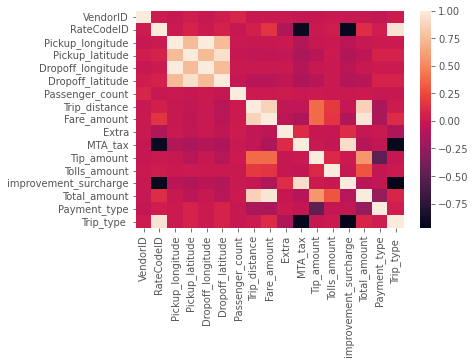

In [10]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr)
pass;

In [11]:
df[["lpep_pickup_datetime", "Lpep_dropoff_datetime"]] = df[["lpep_pickup_datetime", "Lpep_dropoff_datetime"]].apply(pd.to_datetime)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1499837 entries, 0 to 1510721
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1499837 non-null  int64         
 1   lpep_pickup_datetime   1499837 non-null  datetime64[ns]
 2   Lpep_dropoff_datetime  1499837 non-null  datetime64[ns]
 3   Store_and_fwd_flag     1499837 non-null  object        
 4   RateCodeID             1499837 non-null  int64         
 5   Pickup_longitude       1499837 non-null  float64       
 6   Pickup_latitude        1499837 non-null  float64       
 7   Dropoff_longitude      1499837 non-null  float64       
 8   Dropoff_latitude       1499837 non-null  float64       
 9   Passenger_count        1499837 non-null  int64         
 10  Trip_distance          1499837 non-null  float64       
 11  Fare_amount            1499837 non-null  float64       
 12  Extra                  14998

In [13]:
from datetime import datetime
from datetime import date
import warnings
warnings.filterwarnings("ignore")

df['date_of_trip'] = df['lpep_pickup_datetime'].dt.date
df['hour_of_day'] = df['lpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['lpep_pickup_datetime'].dt.day_name()
df_time = df.copy()
df

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,date_of_trip,hour_of_day,day_of_week
0,2,2016-02-01 00:00:01,2016-02-01 00:10:06,N,1,-73.939018,40.805214,-73.972534,40.785885,1,2.86,10.5,0.5,0.5,0.00,0.0,0.3,11.80,2,1.0,2016-02-01,0,Monday
1,2,2016-02-01 00:01:33,2016-02-01 00:20:13,N,1,-73.891495,40.746651,-73.890877,40.743896,1,3.35,13.0,0.5,0.5,0.00,0.0,0.3,14.30,2,1.0,2016-02-01,0,Monday
2,2,2016-02-01 00:03:46,2016-02-01 00:21:04,N,1,-73.983780,40.676132,-73.956978,40.718327,1,4.70,17.5,0.5,0.5,3.76,0.0,0.3,22.56,1,1.0,2016-02-01,0,Monday
3,2,2016-02-01 00:00:05,2016-02-01 00:06:48,N,1,-73.807518,40.700375,-73.831657,40.705978,1,2.11,8.0,0.5,0.5,0.00,0.0,0.3,9.30,2,1.0,2016-02-01,0,Monday
4,2,2016-02-01 00:06:20,2016-02-01 00:08:47,N,1,-73.903961,40.744934,-73.900009,40.733601,5,0.98,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0,2016-02-01,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510717,1,2016-02-29 23:00:49,2016-02-29 23:17:52,N,5,-73.867195,40.752384,-73.877914,40.756538,2,2.10,8.0,0.0,0.0,0.00,0.0,0.0,8.00,2,2.0,2016-02-29,23,Monday
1510718,1,2016-02-29 23:00:46,2016-02-29 23:10:08,N,1,-73.916656,40.757957,-73.881950,40.755867,1,1.90,9.0,0.5,0.5,0.00,0.0,0.3,10.30,2,1.0,2016-02-29,23,Monday
1510719,1,2016-02-29 23:00:17,2016-02-29 23:15:02,N,1,-73.979424,40.688305,-73.923569,40.698891,1,3.30,13.0,0.5,0.5,3.55,0.0,0.3,17.85,1,1.0,2016-02-29,23,Monday
1510720,1,2016-02-29 23:00:02,2016-02-29 23:06:22,N,1,-73.987488,40.702381,-73.995041,40.719868,1,2.20,8.5,0.5,0.5,2.90,0.0,0.3,12.70,1,1.0,2016-02-29,23,Monday


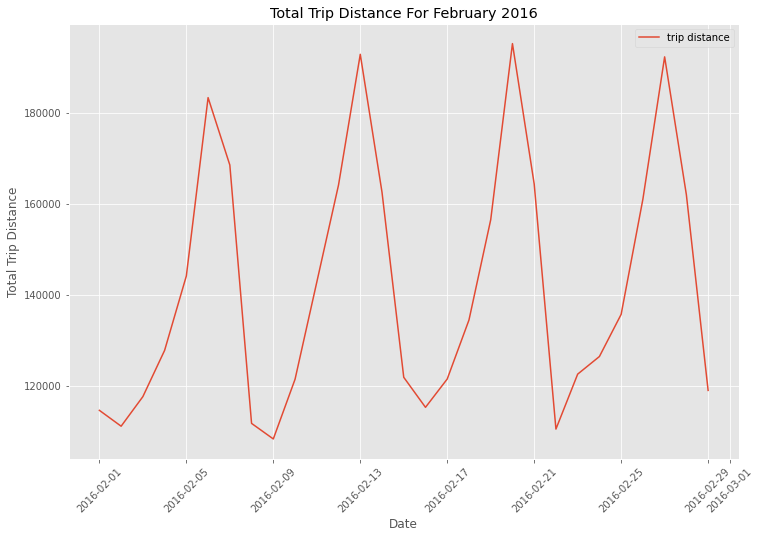

In [14]:
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
plt.style.use('ggplot')

visual = df.groupby(['date_of_trip']).sum()
plt.figure(figsize=(12, 8))
plt.plot(visual.index, visual.Trip_distance)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Total Trip Distance')
plt.title('Total Trip Distance For February 2016')
plt.legend(['trip distance'])
plt.show()

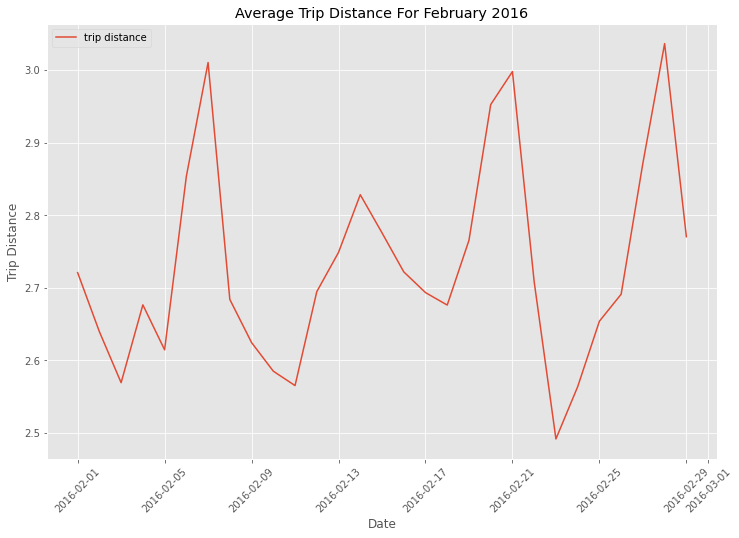

In [15]:
visual = df.groupby(['date_of_trip']).mean()
plt.figure(figsize=(12, 8))
plt.plot(visual.index, visual.Trip_distance)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Trip Distance')
plt.title('Average Trip Distance For February 2016')
plt.legend(['trip distance'])
plt.show()

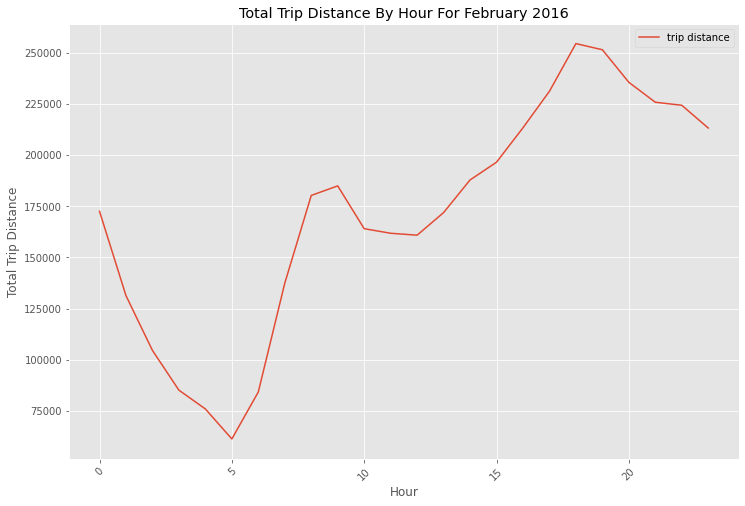

In [16]:
visual = df.groupby(['hour_of_day']).sum()
plt.figure(figsize=(12, 8))
plt.plot(visual.index, visual.Trip_distance)
plt.xlabel('Hour')
plt.xticks(rotation=45)
plt.ylabel('Total Trip Distance')
plt.title('Total Trip Distance By Hour For February 2016')
plt.legend(['trip distance'])
plt.show()

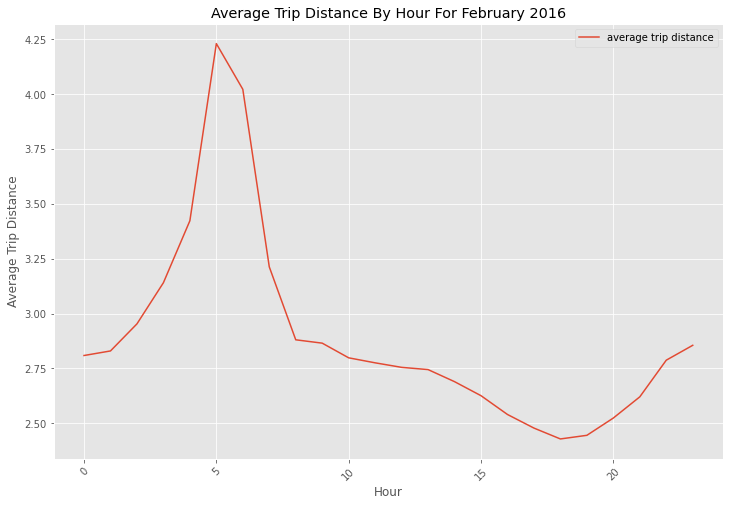

In [17]:
visual = df.groupby(['hour_of_day']).mean()
plt.figure(figsize=(12, 8))
plt.plot(visual.index, visual.Trip_distance)
plt.xlabel('Hour')
plt.xticks(rotation=45)
plt.ylabel('Average Trip Distance')
plt.title('Average Trip Distance By Hour For February 2016')
plt.legend(['average trip distance'])
plt.show()

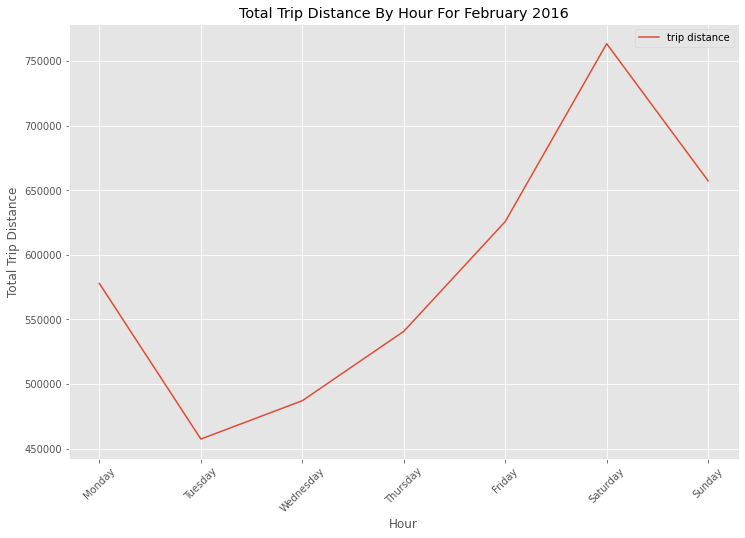

In [18]:
visual = df.groupby(['day_of_week'], sort=False).sum()
plt.figure(figsize=(12, 8))
plt.plot(visual.index, visual.Trip_distance)
plt.xlabel('Hour')
plt.xticks(rotation=45)
plt.ylabel('Total Trip Distance')
plt.title('Total Trip Distance By Hour For February 2016')
plt.legend(['trip distance'])
plt.show()

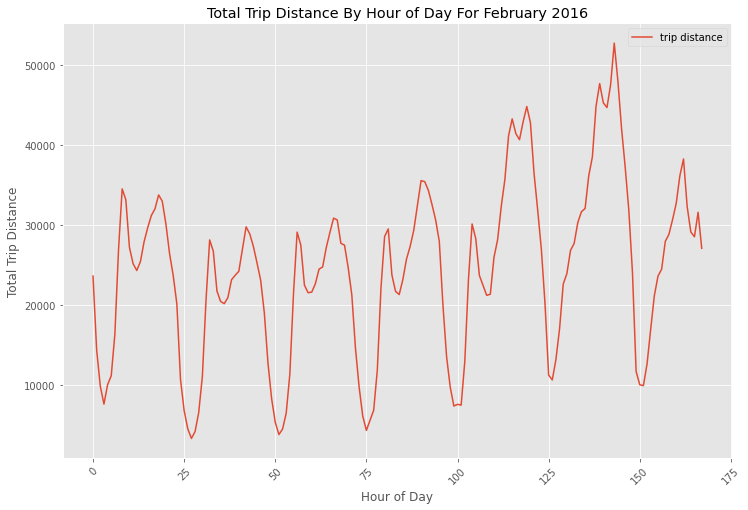

In [19]:
visual = df.groupby(['day_of_week','hour_of_day'], sort=False).sum().reset_index()
plt.figure(figsize=(12, 8))
plt.plot(visual.index, visual.Trip_distance)
plt.xlabel('Hour of Day')
plt.xticks(rotation=45)
plt.ylabel('Total Trip Distance')
plt.title('Total Trip Distance By Hour of Day For February 2016')
plt.legend(['trip distance'])
plt.show()

In [20]:
df_weekday = df[(df['day_of_week'] != 'Saturday') & (df['day_of_week'] != 'Sunday')]
df_weekend = df[(df['day_of_week'] == 'Saturday') | (df['day_of_week'] == 'Sunday')]

In [21]:
def popular_locations(df):
  popular_pickup_location = df.groupby(['Pickup_longitude', 'Pickup_latitude']).count()
  return popular_pickup_location.Extra.idxmax(), popular_pickup_location.loc[popular_pickup_location.Extra.idxmax(), 'Extra']

In [22]:
weekday = popular_locations(df_weekday)
weekend = popular_locations(df_weekend)

print(weekday)
print(weekend)

((-73.84429168701173, 40.721351623535156), 45)
((-73.84429931640625, 40.721351623535156), 17)


In [23]:
!pip install -q geopy
!pip install -q geopandas
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
pass;

     |████████████████████████████████| 994 kB 8.2 MB/s 
     |████████████████████████████████| 15.4 MB 81.5 MB/s 
     |████████████████████████████████| 6.3 MB 59.0 MB/s 


In [24]:
def get_location_details(coordinates):
  locator = Nominatim(user_agent="myGeocoder")
  coordinates = (coordinates[0][1], coordinates[0][0])
  location = locator.reverse(coordinates)
  return location.raw

In [25]:
get_location_details(weekday)

{'address': {'city': 'New York',
  'city_district': 'Queens County',
  'country': 'United States',
  'country_code': 'us',
  'postcode': '11375',
  'road': 'Queens Boulevard',
  'shop': 'The Vitamin Shoppe',
  'state': 'New York',
  'suburb': 'Queens'},
 'boundingbox': ['40.7211907', '40.7212907', '-73.8443553', '-73.8442553'],
 'display_name': 'The Vitamin Shoppe, Queens Boulevard, Queens, Queens County, New York, 11375, United States',
 'lat': '40.7212407',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'lon': '-73.8443053',
 'osm_id': 8572566493,
 'osm_type': 'node',
 'place_id': 310913119}

In [26]:
get_location_details(weekend)

{'address': {'city': 'New York',
  'city_district': 'Queens County',
  'country': 'United States',
  'country_code': 'us',
  'postcode': '11375',
  'road': 'Queens Boulevard',
  'shop': 'The Vitamin Shoppe',
  'state': 'New York',
  'suburb': 'Queens'},
 'boundingbox': ['40.7211907', '40.7212907', '-73.8443553', '-73.8442553'],
 'display_name': 'The Vitamin Shoppe, Queens Boulevard, Queens, Queens County, New York, 11375, United States',
 'lat': '40.7212407',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'lon': '-73.8443053',
 'osm_id': 8572566493,
 'osm_type': 'node',
 'place_id': 310913119}

ML Regression Model

In [27]:
df

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,date_of_trip,hour_of_day,day_of_week
0,2,2016-02-01 00:00:01,2016-02-01 00:10:06,N,1,-73.939018,40.805214,-73.972534,40.785885,1,2.86,10.5,0.5,0.5,0.00,0.0,0.3,11.80,2,1.0,2016-02-01,0,Monday
1,2,2016-02-01 00:01:33,2016-02-01 00:20:13,N,1,-73.891495,40.746651,-73.890877,40.743896,1,3.35,13.0,0.5,0.5,0.00,0.0,0.3,14.30,2,1.0,2016-02-01,0,Monday
2,2,2016-02-01 00:03:46,2016-02-01 00:21:04,N,1,-73.983780,40.676132,-73.956978,40.718327,1,4.70,17.5,0.5,0.5,3.76,0.0,0.3,22.56,1,1.0,2016-02-01,0,Monday
3,2,2016-02-01 00:00:05,2016-02-01 00:06:48,N,1,-73.807518,40.700375,-73.831657,40.705978,1,2.11,8.0,0.5,0.5,0.00,0.0,0.3,9.30,2,1.0,2016-02-01,0,Monday
4,2,2016-02-01 00:06:20,2016-02-01 00:08:47,N,1,-73.903961,40.744934,-73.900009,40.733601,5,0.98,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0,2016-02-01,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510717,1,2016-02-29 23:00:49,2016-02-29 23:17:52,N,5,-73.867195,40.752384,-73.877914,40.756538,2,2.10,8.0,0.0,0.0,0.00,0.0,0.0,8.00,2,2.0,2016-02-29,23,Monday
1510718,1,2016-02-29 23:00:46,2016-02-29 23:10:08,N,1,-73.916656,40.757957,-73.881950,40.755867,1,1.90,9.0,0.5,0.5,0.00,0.0,0.3,10.30,2,1.0,2016-02-29,23,Monday
1510719,1,2016-02-29 23:00:17,2016-02-29 23:15:02,N,1,-73.979424,40.688305,-73.923569,40.698891,1,3.30,13.0,0.5,0.5,3.55,0.0,0.3,17.85,1,1.0,2016-02-29,23,Monday
1510720,1,2016-02-29 23:00:02,2016-02-29 23:06:22,N,1,-73.987488,40.702381,-73.995041,40.719868,1,2.20,8.5,0.5,0.5,2.90,0.0,0.3,12.70,1,1.0,2016-02-29,23,Monday


In [28]:
df = df.groupby(['date_of_trip', 'hour_of_day']).count().reset_index()
df

,date_of_trip,hour_of_day,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,day_of_week
0,2016-02-01,0,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282
1,2016-02-01,1,812,812,812,812,812,812,812,812,812,812,812,812,812,812,812,812,812,812,812,812,812
2,2016-02-01,2,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577
3,2016-02-01,3,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422
4,2016-02-01,4,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2016-02-29,19,2798,2798,2798,2798,2798,2798,2798,2798,2798,2798,2798,2798,2798,2798,2798,2798,2798,2798,2798,2798,2798
692,2016-02-29,20,2506,2506,2506,2506,2506,2506,2506,2506,2506,2506,2506,2506,2506,2506,2506,2506,2506,2506,2506,2506,2506
693,2016-02-29,21,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166,2166
694,2016-02-29,22,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748,1748


In [29]:
df_ml = df[['date_of_trip', 'hour_of_day', 'Extra']]
df_ml

,date_of_trip,hour_of_day,Extra
0,2016-02-01,0,1282
1,2016-02-01,1,812
2,2016-02-01,2,577
3,2016-02-01,3,422
4,2016-02-01,4,456
...,...,...,...
691,2016-02-29,19,2798
692,2016-02-29,20,2506
693,2016-02-29,21,2166
694,2016-02-29,22,1748


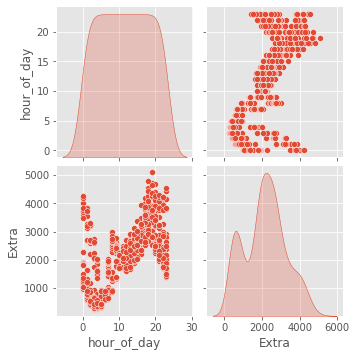

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import missingno as msno # plotting missing data
import seaborn as sns # plotting library
from sklearn import svm

sns.pairplot(df_ml[['date_of_trip', 'hour_of_day', 'Extra']], diag_kind="kde")
pass;

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
temp = le.fit(df.date_of_trip.values)
df_ml['date_of_trip'] = temp.transform(df_ml.date_of_trip.values)
"""#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

df = dummyEncode(df_ml)"""
df_ml

,date_of_trip,hour_of_day,Extra
0,0,0,1282
1,0,1,812
2,0,2,577
3,0,3,422
4,0,4,456
...,...,...,...
691,28,19,2798
692,28,20,2506
693,28,21,2166
694,28,22,1748


In [32]:
le.transform([date(2016, 2, 12)])

array([11])

In [33]:
X = df_ml[['date_of_trip', 'hour_of_day']]
Y = df_ml[['Extra']]

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=2)

In [35]:
#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [36]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
Y_train_scaled = scaler.fit_transform(Y_train)
X_test_scaled = scaler.fit_transform(X_test)
Y_test_scaled = scaler.fit_transform(Y_test)

In [37]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train,Y_train)
#Predicting using test set 
Y_pred = dt_regressor.predict(X_test)
mae=metrics.mean_absolute_error(Y_test, Y_pred)
mse=metrics.mean_squared_error(Y_test, Y_pred)
# Printing the metrics
print('Decision Tree Regression Accuracy: ', dt_regressor.score(X_test,Y_test))
print('R2 square:',metrics.r2_score(Y_test, Y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
for x in range(11, 21):
  pred = float(dt_regressor.predict
              ([[int(le.transform([date(2016, 2, 12)])),x]]))
  print(pred)

Decision Tree Regression Accuracy:  0.7014116567600126
R2 square: 0.7014116567600126
MAE:  388.688995215311
MSE:  366514.8803827751
2481.0
2481.0
2087.0
2690.0
2984.0
3483.0
4185.0
4545.0
4706.0
4706.0


In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(Y_test, y_pred)
mse=metrics.mean_squared_error(Y_test, y_pred)
# Printing the metrics
print('R2 square:',metrics.r2_score(Y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

for x in range(11, 21):
  pred = float(lin_reg.predict
              ([[int(le.transform([date(2016, 2, 12)])),x]]))
  print(pred)

R2 square: 0.4804099769250012
MAE:  638.2770913380278
MSE:  637792.7319230756
2090.2626407329617
2185.35675929683
2280.4508778606987
2375.544996424567
2470.6391149884353
2565.7332335523033
2660.827352116172
2755.9214706800403
2851.015589243909
2946.1097078077773


In [39]:
rf_regressor = RandomForestRegressor(n_estimators = 1000 ,  random_state = 0)
rf_regressor.fit(X_train,Y_train)
#Predicting the SalePrices using test set 
y_pred = rf_regressor.predict(X_test)
mae=metrics.mean_absolute_error(Y_test, y_pred)
mse=metrics.mean_squared_error(Y_test, y_pred)
# Printing the metrics
print('Random Forest Regression Accuracy: ', rf_regressor.score(X_test,Y_test))
print('R2 square:',metrics.r2_score(Y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse,'\n')
for x in range(11, 21):
  pred = float(rf_regressor.predict
              ([[int(le.transform([date(2016, 2, 12)])),x]]))
  print(pred)

Random Forest Regression Accuracy:  0.8503142754720965
R2 square: 0.8503142754720965
MAE:  283.6231196172249
MSE:  183738.0683553971 

2283.763
2197.384
2240.422
2688.766
2995.053
3461.475
3895.001
4523.26
4626.983
4372.002


In [40]:
from sklearn.svm import SVR
regressor= SVR(kernel='rbf')
regressor.fit(X_train,Y_train)
y_pred_svm=regressor.predict(X_test)
#y_pred_svm = cross_val_predict(regressor, x, y)
mae=metrics.mean_absolute_error(Y_test, y_pred_svm)
mse=metrics.mean_squared_error(Y_test, y_pred_svm)
# Printing the metrics
print('Suppport Vector Regression Accuracy: ', regressor.score(X_test,Y_test))
print('R2 square:',metrics.r2_score(Y_test, y_pred_svm))
print('MAE: ', mae)
print('MSE: ', mse, '\n')

for x in range(11, 21):
  pred = float(regressor.predict
             ([[int(le.transform([date(2016, 2, 12)])),x]]))
  print(pred)

Suppport Vector Regression Accuracy:  0.05201890936847664
R2 square: 0.05201890936847664
MAE:  866.1380799414376
MSE:  1163639.4517875963 

2175.824995368493
2186.610649454219
2197.1404773289473
2207.061390652355
2216.050952423594
2223.8345720147295
2230.1994355671145
2235.004167769779
2238.18358067994
2239.748287743614


In [41]:
from sklearn.ensemble import GradientBoostingRegressor
outcome = []
model_names = []
models = [('Linear', LinearRegression()),
          ('Ridge', Ridge()),
          ('Lasso', Lasso()),
          ('Bagging', BaggingRegressor()),
          ('Ada', AdaBoostRegressor()),
          ('SVM', SVR()), 
          ('DecTree', DecisionTreeRegressor()),
          ('KNN', KNeighborsRegressor()),
          ('RanForest', RandomForestRegressor()),
          ('XGB', GradientBoostingRegressor())]

In [42]:
from sklearn import model_selection
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=42)
    results = model_selection.cross_validate(model, X_train, Y_train, cv=k_fold_validation, scoring=['r2','neg_mean_squared_error','neg_mean_absolute_error'])
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| R2 Squared=%f MSE=%f MAE=%f" % (model_name, results['test_r2'].mean(), results['test_neg_mean_squared_error'].mean() * -1, results['test_neg_mean_absolute_error'].mean() * -1)
    print(output_message)

Linear| R2 Squared=0.356936 MSE=724374.943250 MAE=656.688468
Ridge| R2 Squared=0.356938 MSE=724374.496085 MAE=656.690972
Lasso| R2 Squared=0.356941 MSE=724374.456971 MAE=656.700443
Bagging| R2 Squared=0.790061 MSE=236767.046048 MAE=331.463559
Ada| R2 Squared=0.549816 MSE=498444.583518 MAE=570.704736
SVM| R2 Squared=0.005479 MSE=1125491.707510 MAE=848.257356
DecTree| R2 Squared=0.710600 MSE=323018.421896 MAE=376.751233
KNN| R2 Squared=0.796860 MSE=228718.276624 MAE=349.497066
RanForest| R2 Squared=0.816050 MSE=206783.127400 MAE=311.790864
XGB| R2 Squared=0.765275 MSE=259709.399375 MAE=376.364133


In [43]:
r2, mse, mae = [], [], []
for x in range(0,9):
  r2.append(outcome[x]['test_r2'])
  mse.append(outcome[x]['test_neg_mean_squared_error'])
  mae.append(outcome[x]['test_neg_mean_absolute_error'])

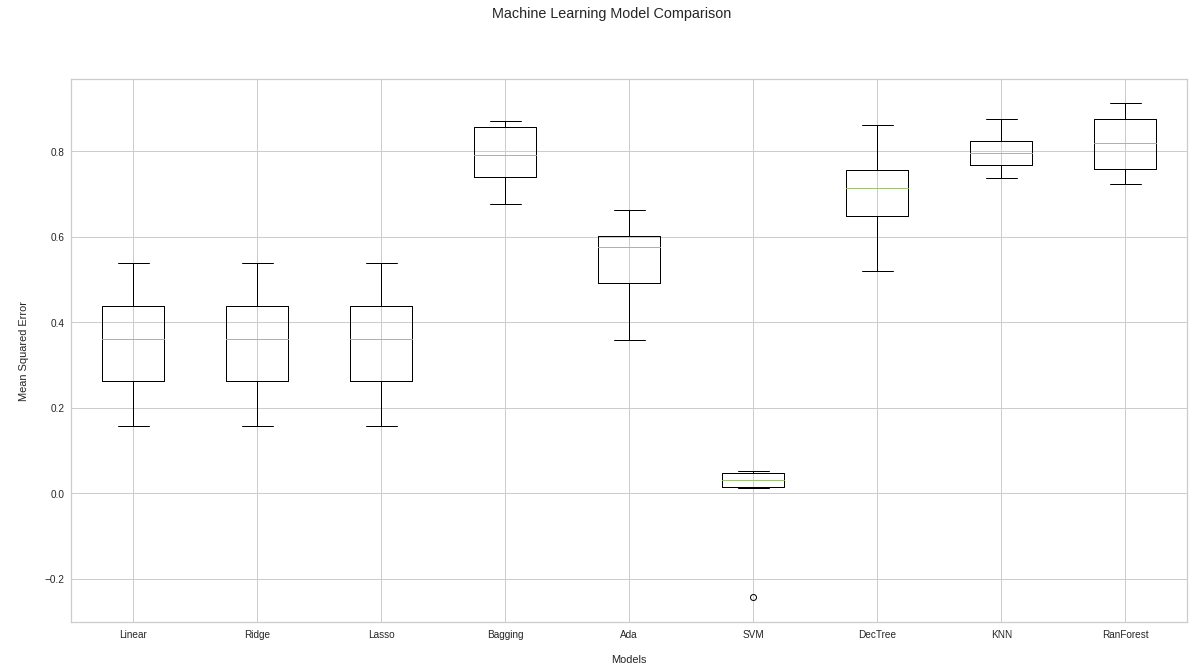

In [44]:
plt.rcParams["figure.figsize"] = (20,10)
fig = plt.figure()
plt.rcParams["figure.figsize"] = (20,10)
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(r2)
plt.xlabel('\nModels')
plt.ylabel('\nMean Squared Error\n')
ax.set_xticklabels(model_names)
plt.show()

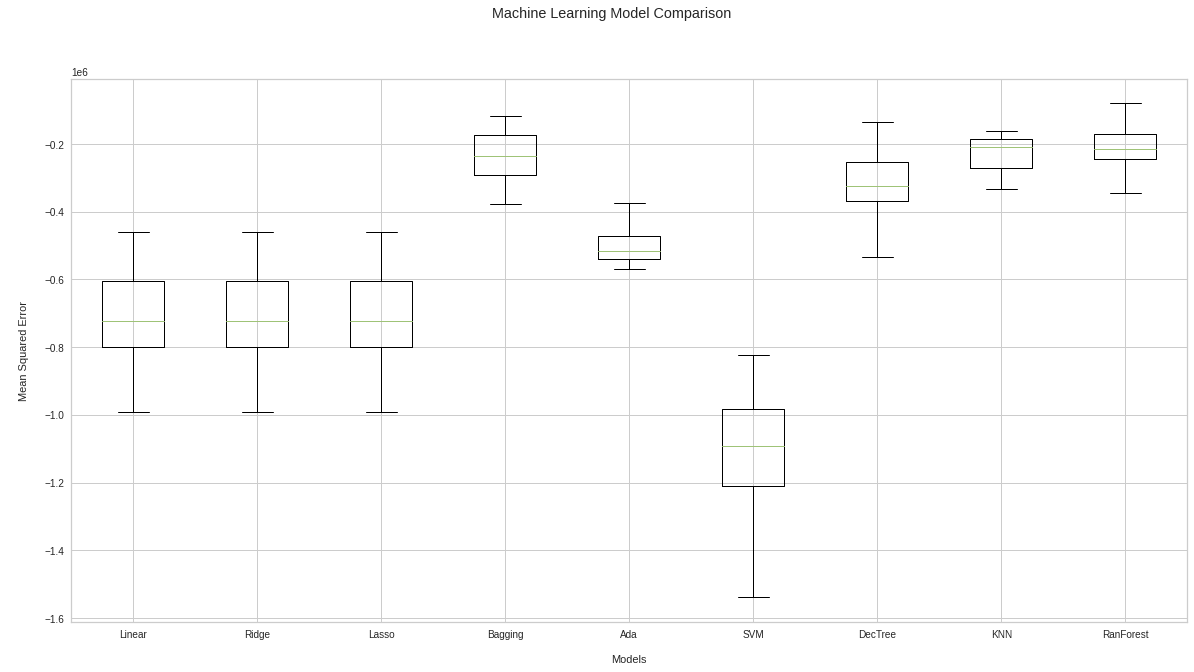

In [45]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (20,10)
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(mse)
plt.xlabel('\nModels')
plt.ylabel('\nMean Squared Error\n')
ax.set_xticklabels(model_names)
plt.show()

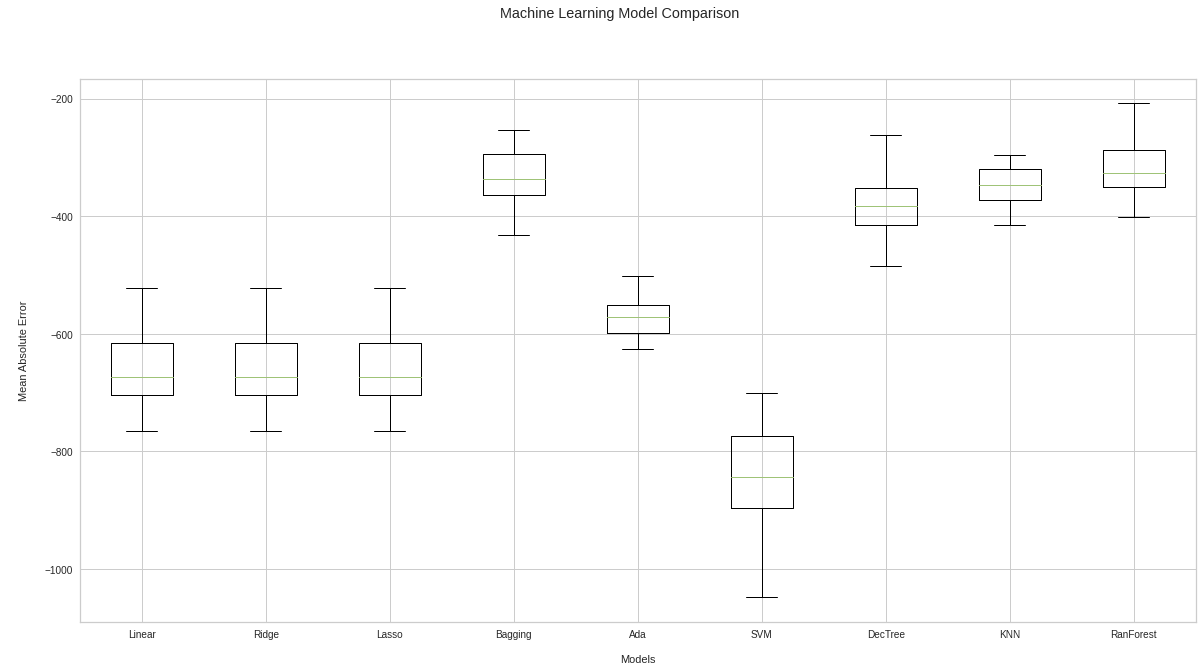

In [46]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (20,10)
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(mae)
plt.xlabel('\nModels')
plt.ylabel('\nMean Absolute Error\n')
ax.set_xticklabels(model_names)
plt.show()

In [47]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [48]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(512, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mse','mape'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1536      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 264,705
Trainable params: 264,705
Non-trainable params: 0
_________________________________________________________________


In [49]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [50]:
model = NN_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/100
13/13 [==============================] - 2s 18ms/step - loss: 5845579.0000 - mae: 2154.4695 - mse: 5845579.0000 - mape: 99.1813 - val_loss: 5448879.5000 - val_mae: 2109.2278 - val_mse: 5448879.5000 - val_mape: 96.2321

Epoch 00001: val_loss improved from inf to 5448879.50000, saving model to Weights-001--5448879.50000.hdf5
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 4790808.5000 - mae: 1896.5645 - mse: 4790808.5000 - mape: 83.1601 - val_loss: 2334206.0000 - val_mae: 1299.8330 - val_mse: 2334206.0000 - val_mape: 57.7663

Epoch 00002: val_loss improved from 5448879.50000 to 2334206.00000, saving model to Weights-002--2334206.00000.hdf5
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 1655528.7500 - mae: 1025.8746 - mse: 1655528.7500 - mape: 70.9947 - val_loss: 991643.8125 - val_mae: 797.8810 - val_mse: 991643.8125 - val_mape: 61.0655

Epoch 00003: val_loss improved from 2334206.00000 to 991643.81250, saving model to Weights

In [51]:
test_loss = NN_model.evaluate(X_test, Y_test)
loss = model.history['loss']
acc = model.history['mae']
val_loss = model.history['val_loss']
val_acc = model.history['val_mae']
mape_loss=model.history['mape']

7/7 [==============================] - 0s 2ms/step - loss: 526476.0625 - mae: 587.5093 - mse: 526476.0625 - mape: 51.0244


In [52]:
y_pred = NN_model.predict(X_test)
mae=metrics.mean_absolute_error(Y_test, y_pred)
mse=metrics.mean_squared_error(Y_test, y_pred)
# Printing the metrics
print('Deep Neural Network Metrics')
print('R2 square:',metrics.r2_score(Y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse, '\n')

for x in range(11, 21):
  pred = float(NN_model.predict
             ([[int(le.transform([date(2016, 2, 12)])),x]]))
  print(pred)

Deep Neural Network Metrics
R2 square: 0.5710962374898312
MAE:  587.5093474319677
MSE:  526476.0489520823 

2137.642822265625
2271.31982421875
2404.9970703125
2538.67529296875
2672.353759765625
2806.03173828125
2939.658203125
3066.71337890625
3184.85986328125
3296.71875


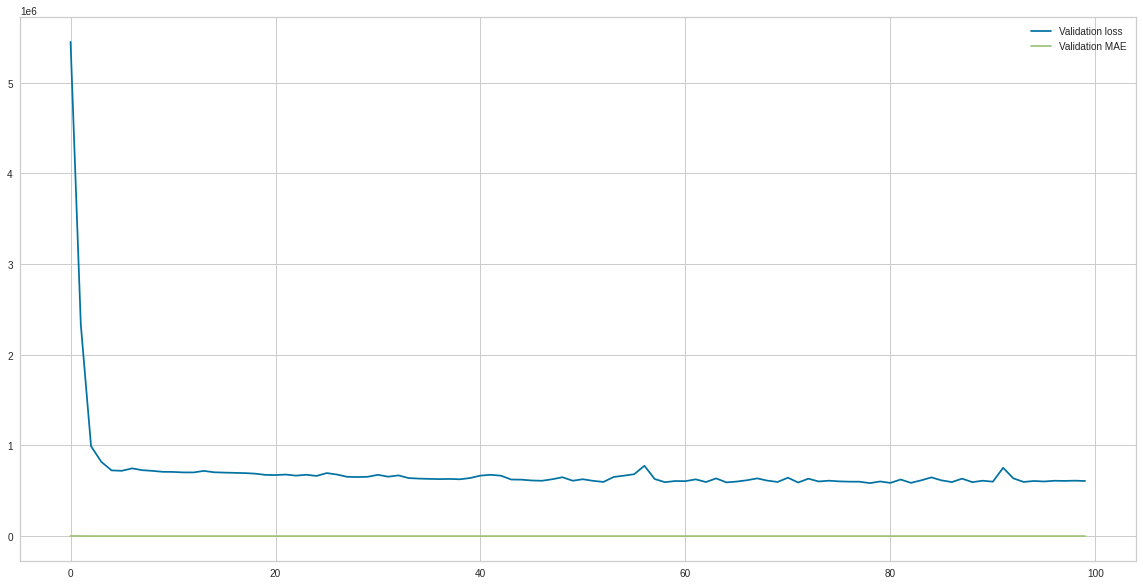

In [53]:
epochs = range(0, len(loss))
plt.plot(epochs, val_loss, label='Validation loss')
plt.plot(epochs, val_acc, label='Validation MAE')
plt.legend()
plt.show()

In [54]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [55]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [56]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=32, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))
pass;

Baseline: -5461677.25 (1318081.15) MSE


In [57]:
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
	model.add(Dense(3, kernel_initializer='normal', activation='relu'))
	model.add(Dense(2, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [58]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -2843006.87 (2814865.00) MSE


In [59]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [60]:
df_time

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,date_of_trip,hour_of_day,day_of_week
0,2,2016-02-01 00:00:01,2016-02-01 00:10:06,N,1,-73.939018,40.805214,-73.972534,40.785885,1,2.86,10.5,0.5,0.5,0.00,0.0,0.3,11.80,2,1.0,2016-02-01,0,Monday
1,2,2016-02-01 00:01:33,2016-02-01 00:20:13,N,1,-73.891495,40.746651,-73.890877,40.743896,1,3.35,13.0,0.5,0.5,0.00,0.0,0.3,14.30,2,1.0,2016-02-01,0,Monday
2,2,2016-02-01 00:03:46,2016-02-01 00:21:04,N,1,-73.983780,40.676132,-73.956978,40.718327,1,4.70,17.5,0.5,0.5,3.76,0.0,0.3,22.56,1,1.0,2016-02-01,0,Monday
3,2,2016-02-01 00:00:05,2016-02-01 00:06:48,N,1,-73.807518,40.700375,-73.831657,40.705978,1,2.11,8.0,0.5,0.5,0.00,0.0,0.3,9.30,2,1.0,2016-02-01,0,Monday
4,2,2016-02-01 00:06:20,2016-02-01 00:08:47,N,1,-73.903961,40.744934,-73.900009,40.733601,5,0.98,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0,2016-02-01,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510717,1,2016-02-29 23:00:49,2016-02-29 23:17:52,N,5,-73.867195,40.752384,-73.877914,40.756538,2,2.10,8.0,0.0,0.0,0.00,0.0,0.0,8.00,2,2.0,2016-02-29,23,Monday
1510718,1,2016-02-29 23:00:46,2016-02-29 23:10:08,N,1,-73.916656,40.757957,-73.881950,40.755867,1,1.90,9.0,0.5,0.5,0.00,0.0,0.3,10.30,2,1.0,2016-02-29,23,Monday
1510719,1,2016-02-29 23:00:17,2016-02-29 23:15:02,N,1,-73.979424,40.688305,-73.923569,40.698891,1,3.30,13.0,0.5,0.5,3.55,0.0,0.3,17.85,1,1.0,2016-02-29,23,Monday
1510720,1,2016-02-29 23:00:02,2016-02-29 23:06:22,N,1,-73.987488,40.702381,-73.995041,40.719868,1,2.20,8.5,0.5,0.5,2.90,0.0,0.3,12.70,1,1.0,2016-02-29,23,Monday


In [61]:
df_time_forecast = df_time[df_time['lpep_pickup_datetime']<datetime(2016,2,12,10,0,0)]
df_time_forecast = df_time_forecast.resample('H', on='lpep_pickup_datetime').count()
df_time_forecast.index

DatetimeIndex(['2016-02-01 00:00:00', '2016-02-01 01:00:00',
               '2016-02-01 02:00:00', '2016-02-01 03:00:00',
               '2016-02-01 04:00:00', '2016-02-01 05:00:00',
               '2016-02-01 06:00:00', '2016-02-01 07:00:00',
               '2016-02-01 08:00:00', '2016-02-01 09:00:00',
               ...
               '2016-02-12 00:00:00', '2016-02-12 01:00:00',
               '2016-02-12 02:00:00', '2016-02-12 03:00:00',
               '2016-02-12 04:00:00', '2016-02-12 05:00:00',
               '2016-02-12 06:00:00', '2016-02-12 07:00:00',
               '2016-02-12 08:00:00', '2016-02-12 09:00:00'],
              dtype='datetime64[ns]', name='lpep_pickup_datetime', length=274, freq='H')

In [62]:
df_time_forecast = df_time[df_time['lpep_pickup_datetime']<datetime(2016,2,12,10,0,0)]
df_time_forecast = df_time_forecast.resample('H', on='lpep_pickup_datetime').count()
#df_time_forecast['lpep_pickup_datetime'] = pd.to_datetime(df_time_forecast['lpep_pickup_datetime'])
#df_time_forecast = df_time_forecast.set_index('lpep_pickup_datetime')
#df_time_forecast.index = pd.DatetimeIndex(df_time_forecast.index)
"""df_time_forecast.index"""
df_time_forecast

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,date_of_trip,hour_of_day,day_of_week
lpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,,,
2016-02-01 00:00:00,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282,1282
2016-02-01 01:00:00,812,812,812,812,812,812,812,812,812,812,812,812,812,812,812,812,812,812,812,812,812,812,812
2016-02-01 02:00:00,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577
2016-02-01 03:00:00,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422,422
2016-02-01 04:00:00,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-02-12 05:00:00,412,412,412,412,412,412,412,412,412,412,412,412,412,412,412,412,412,412,412,412,412,412,412
2016-02-12 06:00:00,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866,866
2016-02-12 07:00:00,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033,2033


In [63]:
ts = df_time_forecast['Trip_distance']
len(ts)

274

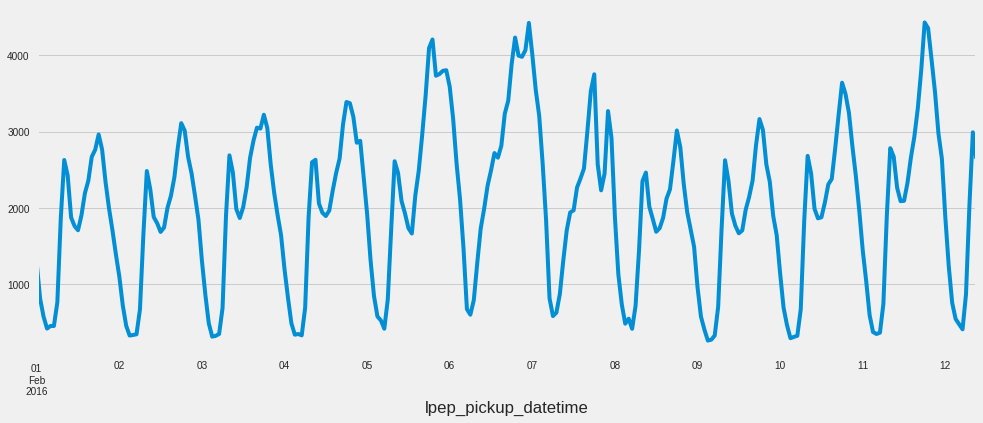

In [64]:
ts.plot(figsize=(15, 6))
plt.show()

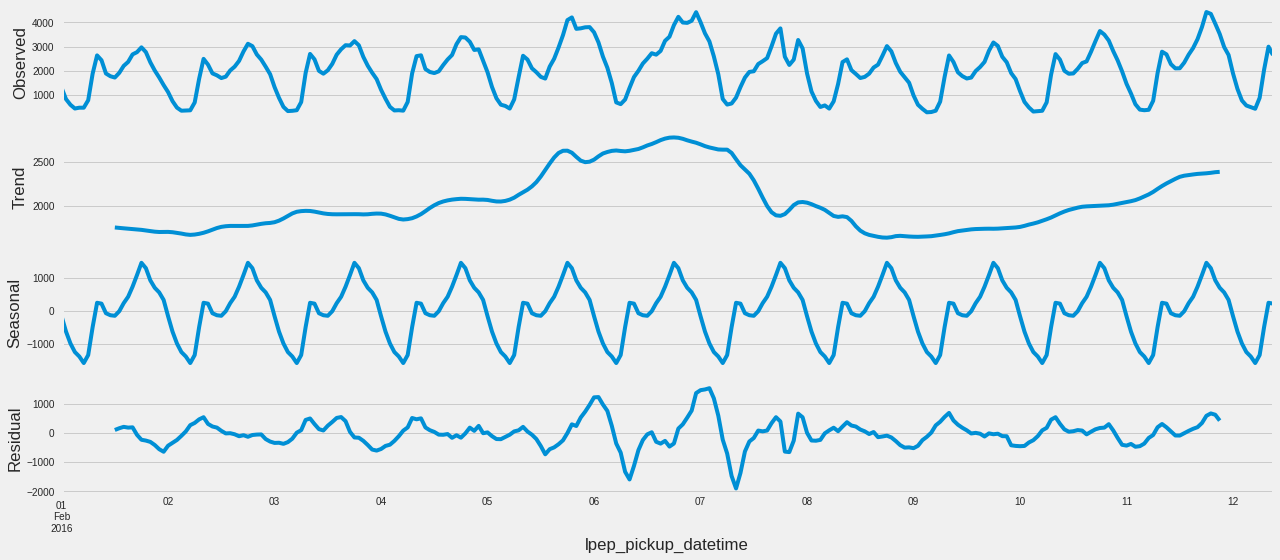

In [65]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

In [66]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

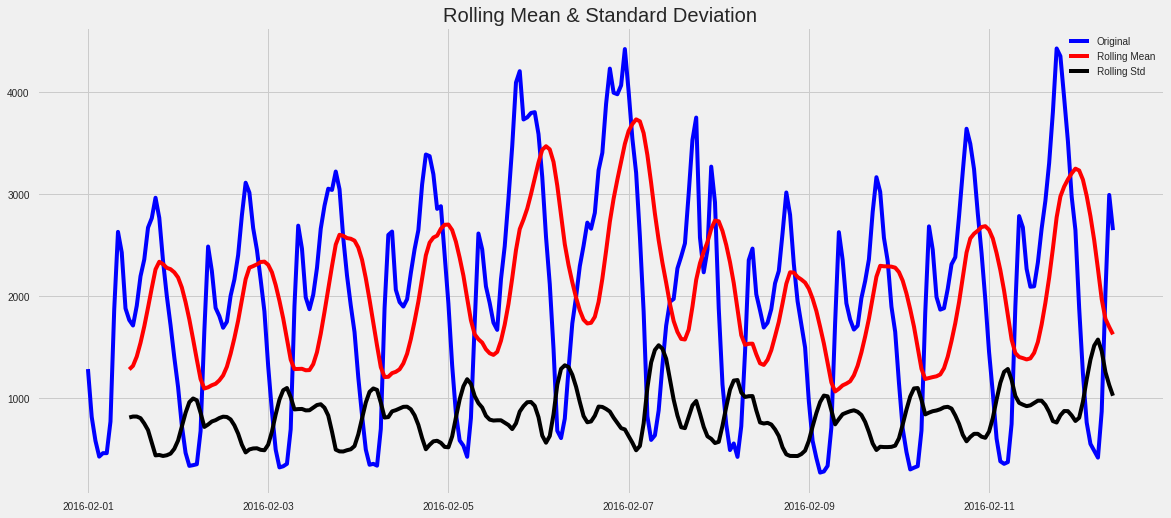

Results of Dickey-Fuller Test:
Test Statistic                -5.854767e+00
p-value                        3.521133e-07
#Lags Used                     1.300000e+01
Number of Observations Used    2.600000e+02
Critical Value (1%)           -3.455754e+00
Critical Value (5%)           -2.872721e+00
Critical Value (10%)          -2.572728e+00
dtype: float64


In [67]:
test_stationarity(ts)

In [68]:
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8920      0.021     42.888      0.000       0.851       0.933
ma.L1         -1.0000      0.051    -19.580      0.000      -1.100      -0.900
ar.S.L12      -0.9245      0.024    -38.173      0.000      -0.972      -0.877
sigma2      6.951e+04   7.34e-07   9.46e+10      0.000    6.95e+04    6.95e+04


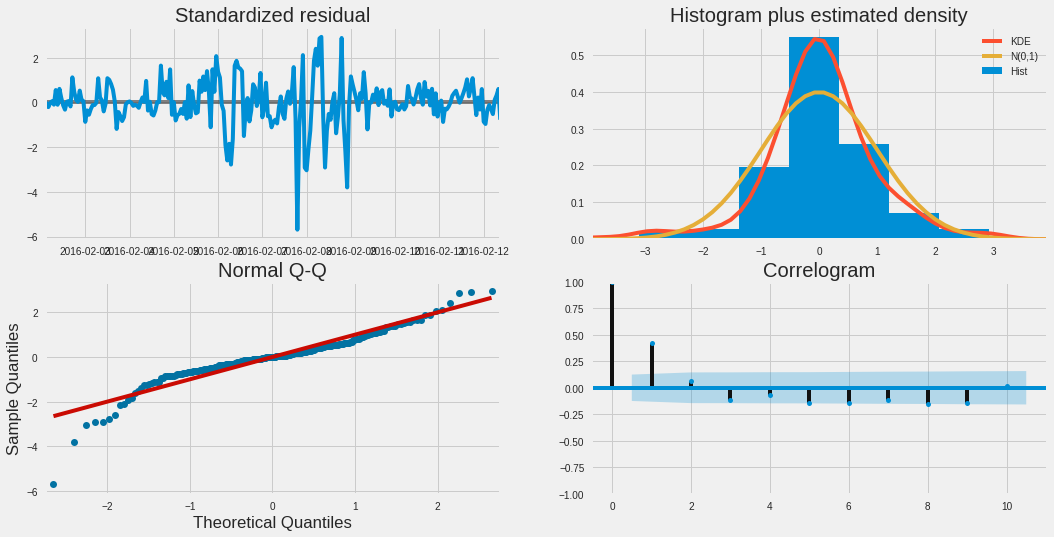

In [69]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

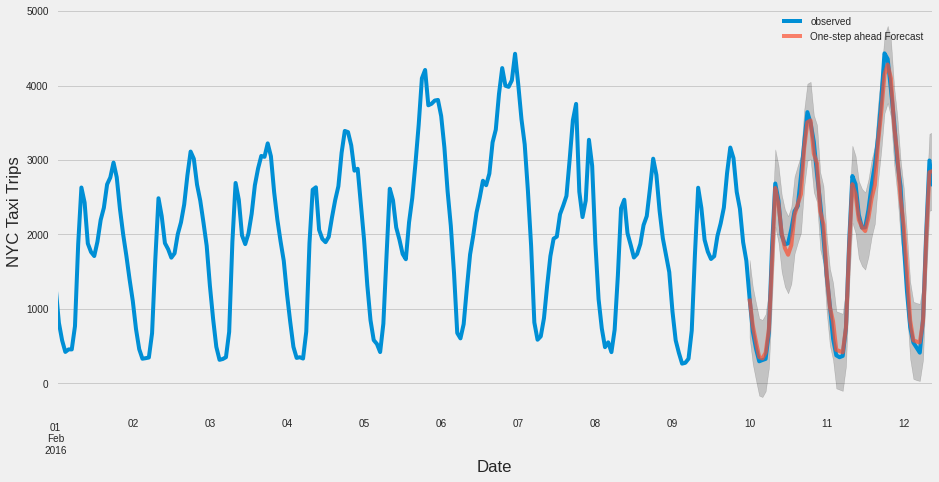

In [70]:
pred = results.get_prediction(start=pd.to_datetime('2016-02-10'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('NYC Taxi Trips')
plt.legend()
plt.show()

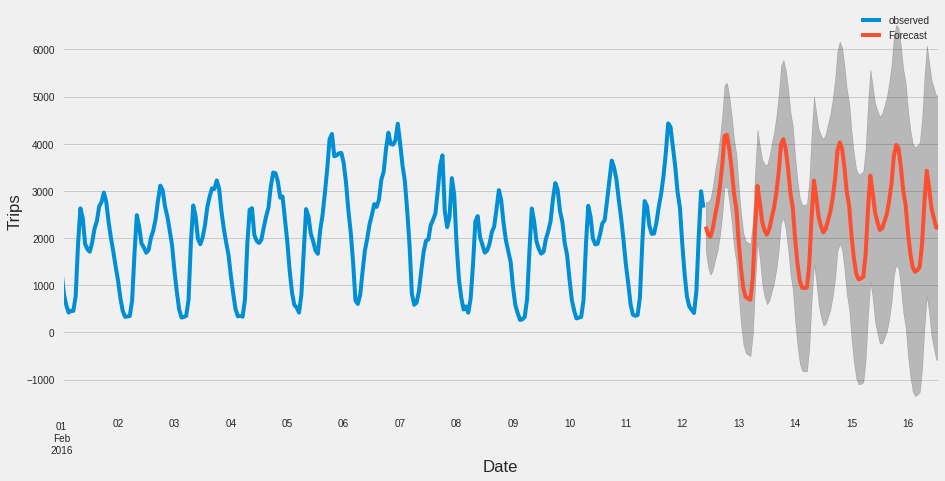

In [71]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = ts.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Trips')
plt.legend()
plt.show()

Time Series Forecasting In Prophet

In [72]:
!pip install -q fbprophet

import fbprophet

ds = list(df_time_forecast.index)
y = list(df_time_forecast['lpep_pickup_datetime'].values)

timeseries = pd.DataFrame(list(zip(ds, y)), columns =['ds', 'y'])
gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.15, weekly_seasonality=True)
gm_prophet.fit(timeseries)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [73]:
gm_forecast = gm_prophet.make_future_dataframe(periods= 10, freq='D')
gm_forecast = gm_prophet.predict(gm_forecast)

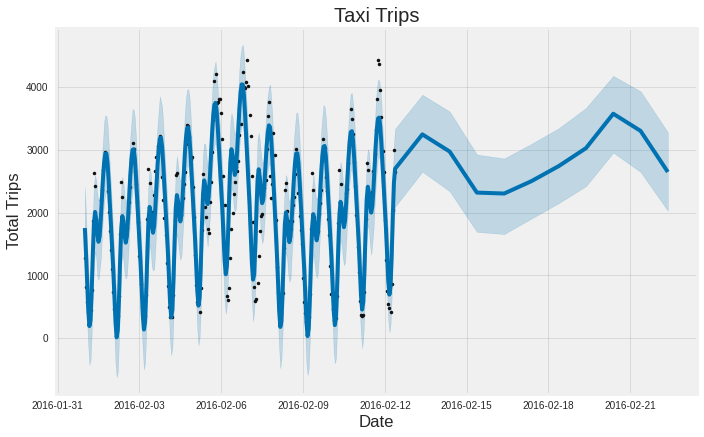

In [74]:
gm_prophet.plot(gm_forecast, xlabel = 'Date', ylabel = 'Total Trips')
plt.title('Taxi Trips');

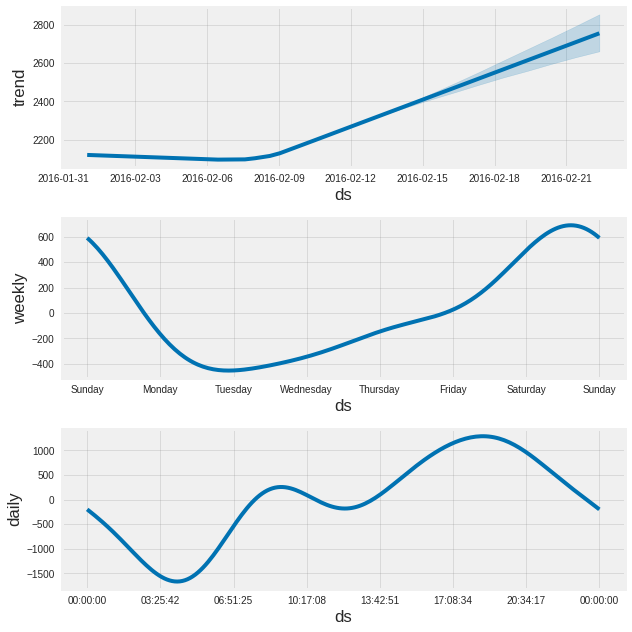

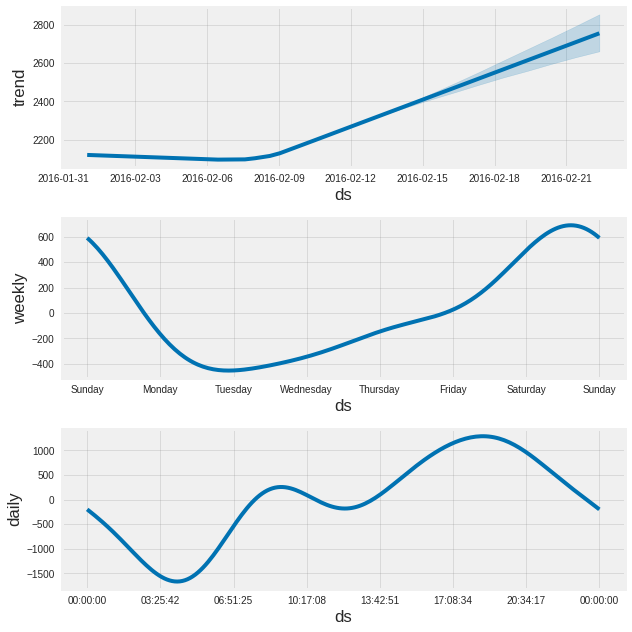

In [75]:
gm_prophet.plot_components(gm_forecast)

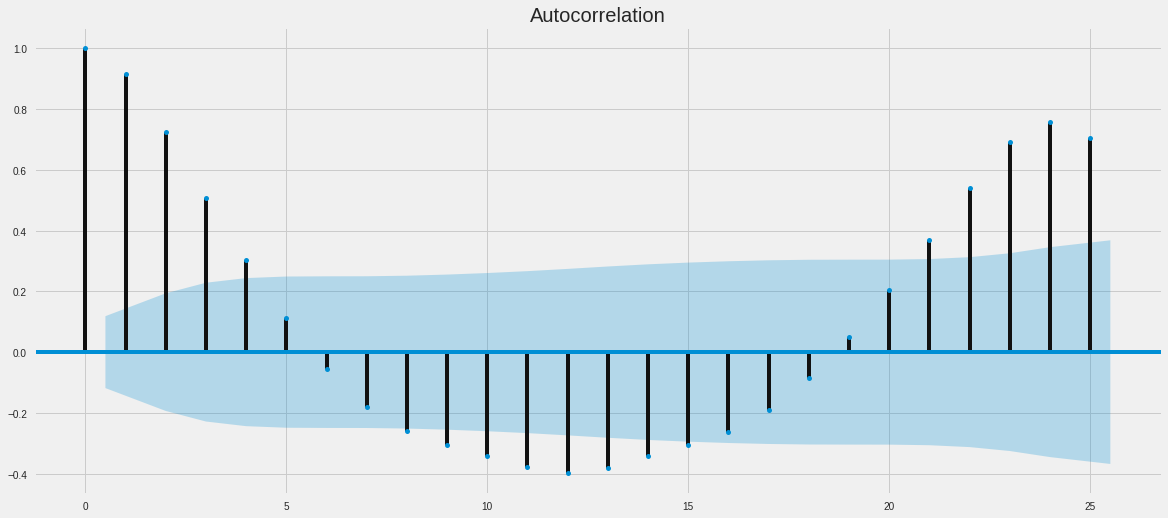

In [76]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_plot = plot_acf(ts)

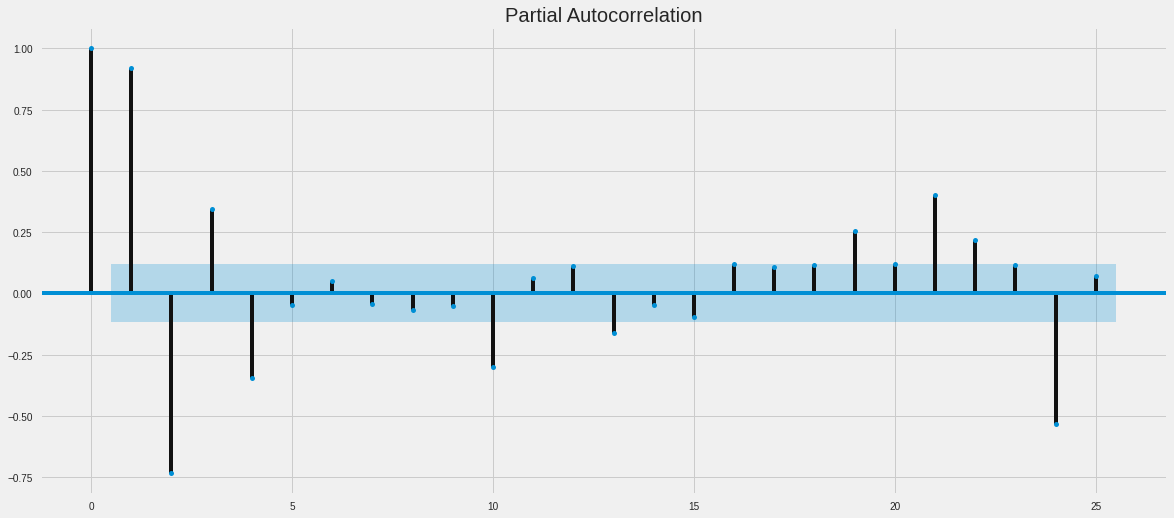

In [77]:
pacf_plot = plot_pacf(ts)

In [78]:
from datetime import timedelta

df_time = df_time.resample('H', on='lpep_pickup_datetime').count()

train_end = datetime(2016,2,12,10,0,0)
test_end = datetime(2016,2,28,20,0,0)

train_data = df_time[:train_end]
test_data = df_time[train_end + timedelta(days=1):test_end]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



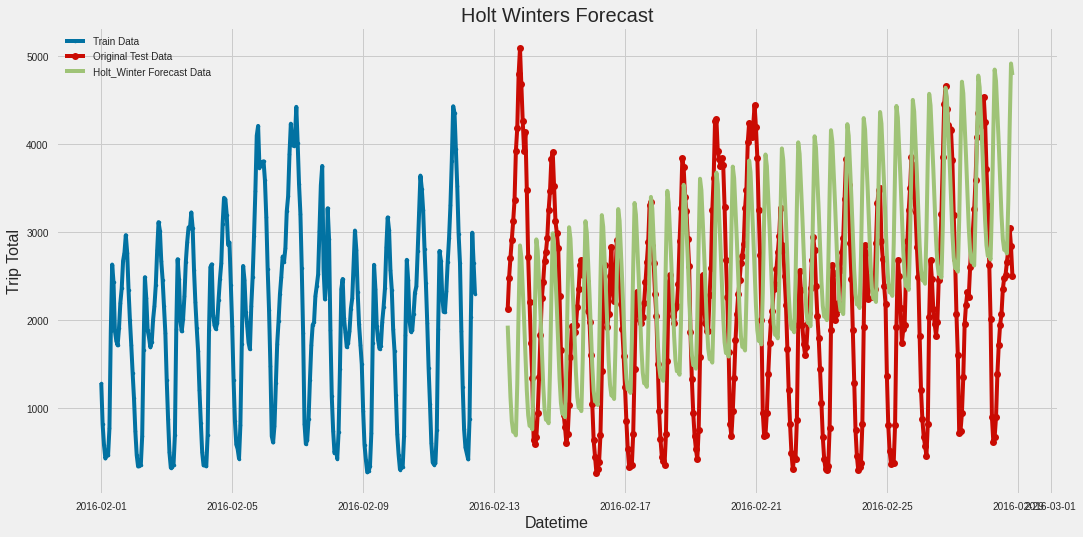

In [79]:
from statsmodels.tsa.api import ExponentialSmoothing

holt_winter = ExponentialSmoothing(np.asarray(train_data['Trip_distance']), seasonal_periods=12, trend='add', seasonal='add')

hw_fit = holt_winter.fit()

hw_forecast = hw_fit.forecast(len(test_data))

plt.figure(figsize=(16,8))

plt.plot(train_data.index, train_data['Trip_distance'], "b.-", label='Train Data')
plt.plot(test_data.index, test_data['Trip_distance'], "ro-", label='Original Test Data')
plt.plot(test_data.index, hw_forecast, "gx-", label='Holt_Winter Forecast Data')
plt.ylabel('Trip Total', fontsize=16)
plt.xlabel('Datetime', fontsize=16)
plt.legend(loc='best')
plt.title('Holt Winters Forecast', fontsize=20)
plt.show()
pass;

In [80]:
!pip install -q pmdarima
from pmdarima import auto_arima

Sarimax_model = auto_arima(train_data.Trip_distance,
                       start_p=0,
                       start_q=0,
                       max_p=3,
                       max_q=3,
                       m=12,
                       test='adf',
                       seasonal=True,
                       d=1,
                       D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)

Sarimax_model.summary()

     |████████████████████████████████| 1.4 MB 8.4 MB/s 
     |████████████████████████████████| 9.5 MB 66.8 MB/s 
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=3697.361, Time=0.52 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4143.935, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.89 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.90 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=5.41 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=2.29 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=inf, Time=0.56 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=8.42 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=3652.524, Time=2.10 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.73 sec
 ARIMA(1,1,0)(2,1,1)[

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  275
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 12)   Log Likelihood               -1819.250
Date:                            Tue, 28 Sep 2021   AIC                           3646.500
Time:                                    16:22:12   BIC                           3660.774
Sample:                                         0   HQIC                          3652.237
                                            - 275                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4790      0.038     12.509      0.000       0.404       0.554
ar.L2         -0.1603      0.048     -3.321      0.001      -0.255      -0.066
ar.S.L12      -0.8838      0.023    -38.828      0.000      -0.928      -0.839
sigma2      5.956e+04   3246.059     18.348      0.000    5.32e+04    6.59e+04
===================================================================================
Ljung-Box (Q):                       75.17   Jarque-Bera (JB):               224.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                            -0.82
Prob(H) (two-sided):                  0.19   Kurtosis:                         7.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

order = (2,1,0)
seasonal_order = (1, 1, 0, 12)
model = SARIMAX(train_data.Trip_distance, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()
print(model_fit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                      Trip_distance   No. Observations:                  275
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 12)   Log Likelihood               -1819.250
Date:                            Tue, 28 Sep 2021   AIC                           3646.500
Time:                                    16:22:13   BIC                           3660.774
Sample:                                02-01-2016   HQIC                          3652.237
                                     - 02-12-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4790      0.038     12.509      0.000       0.404       0.554
ar.L2         -0.1603      0.048   

In [82]:
predictions = model_fit.forecast(len(test_data.Trip_distance))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data.Trip_distance - predictions

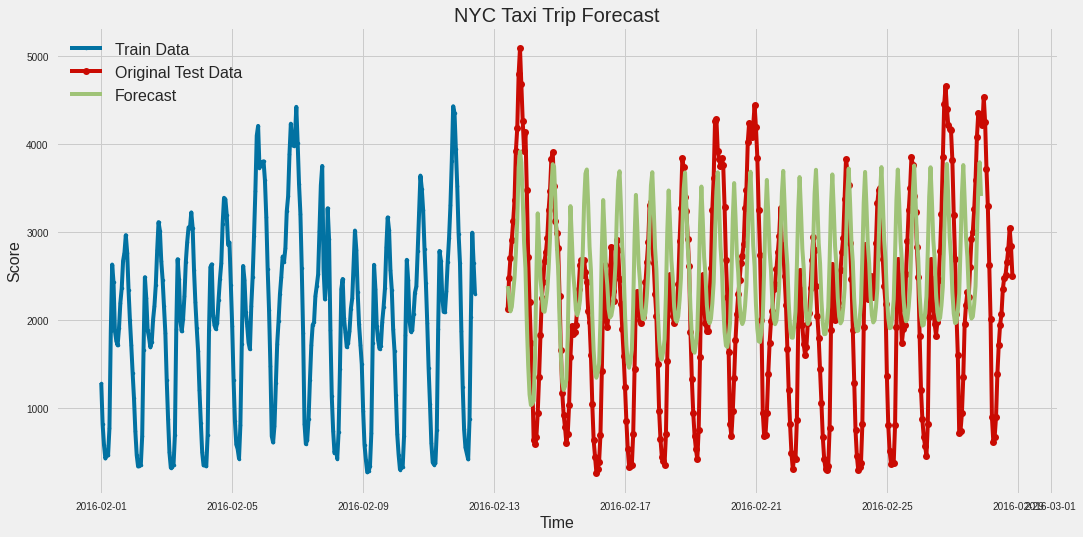

In [83]:
plt.figure(figsize=(16,8))

plt.plot(train_data.Trip_distance, "b.-")
plt.plot(test_data.Trip_distance, "ro-")
plt.plot(predictions, "gx-")

plt.legend(('Train Data', 'Original Test Data', 'Forecast'), fontsize=16)

plt.title('NYC Taxi Trip Forecast', fontsize=20)
plt.ylabel('Score', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.show()
pass;

In [84]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data.Trip_distance)),3))

Mean Absolute Percent Error: 0.792


In [85]:
y_to_train = ts # dataset to train
y_to_val = df_time[(df_time.index>datetime(2016,2,12,10,0,0)) & (df_time.index<=datetime(2016,2,12,20,0,0))] 
y_to_val = y_to_val.Trip_distance 
y = df_time.Trip_distance
predict_date = len(y) - len(y[:'2016-02-12 20:00:00'])
predict_date

411

In [86]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing 

def ses(y, y_to_train,y_to_test,smoothing_level,predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()

The Root Mean Squared Error of our forecasts with smoothing level of 0.8 is 1196.9
The Root Mean Squared Error of our forecasts with auto optimization is 1208.15


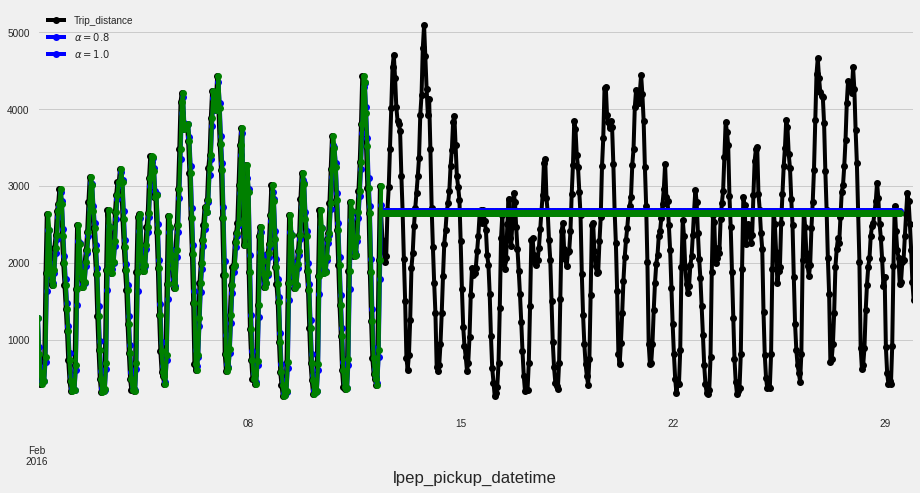

In [87]:
ses(y, y_to_train,y_to_val,0.8,predict_date)

In [88]:
from statsmodels.tsa.api import ExponentialSmoothing

def holt_win_sea(y,y_to_train,y_to_test,seasonal_type,seasonal_period,predict_date):
    
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    fit3 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul').fit(use_boxcox=True)
    fcast3 = fit3.forecast(predict_date).rename('Multiplicative')
    mse3 = ((fcast3 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of additive trend, multiplicative seasonal of '+ 'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse3), 2)))
        
    fit4 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
    fcast4 = fit4.forecast(predict_date).rename('Multiplicative+damped')
    mse4 = ((fcast3 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of additive damped trend, multiplicative seasonal of '+ 'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse4), 2)))
        
    fit3.fittedvalues.plot(style='--', color='red')
    fcast3.plot(style='--', marker='o', color='red', legend=True)
    fit4.fittedvalues.plot(style='--', color='green')
    fcast4.plot(style='--', marker='o', color='green', legend=True)

    plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



The Root Mean Squared Error of additive trend, multiplicative seasonal of period season_length=52 and a Box-Cox transformation 1791.94


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



The Root Mean Squared Error of additive damped trend, multiplicative seasonal of period season_length=52 and a Box-Cox transformation 1791.94


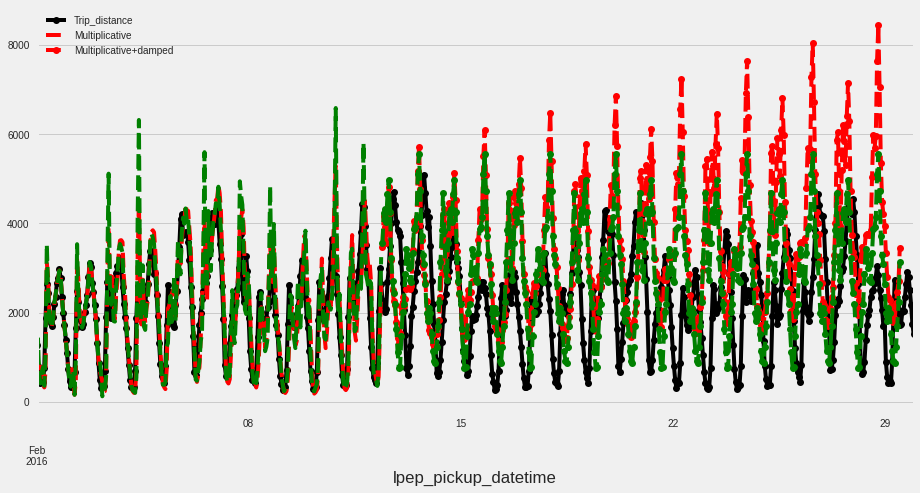

In [89]:
holt_win_sea(y, y_to_train,y_to_val,'multiplicative',52, predict_date)

In [90]:
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()
    
    return (results)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4965      0.029     16.996      0.000       0.439       0.554
ar.L2         -0.0708      0.026     -2.714      0.007      -0.122      -0.020
ar.S.L12      -0.8638      0.018    -47.111      0.000      -0.900      -0.828
sigma2      6.231e+04   2216.860     28.108      0.000     5.8e+04    6.67e+04


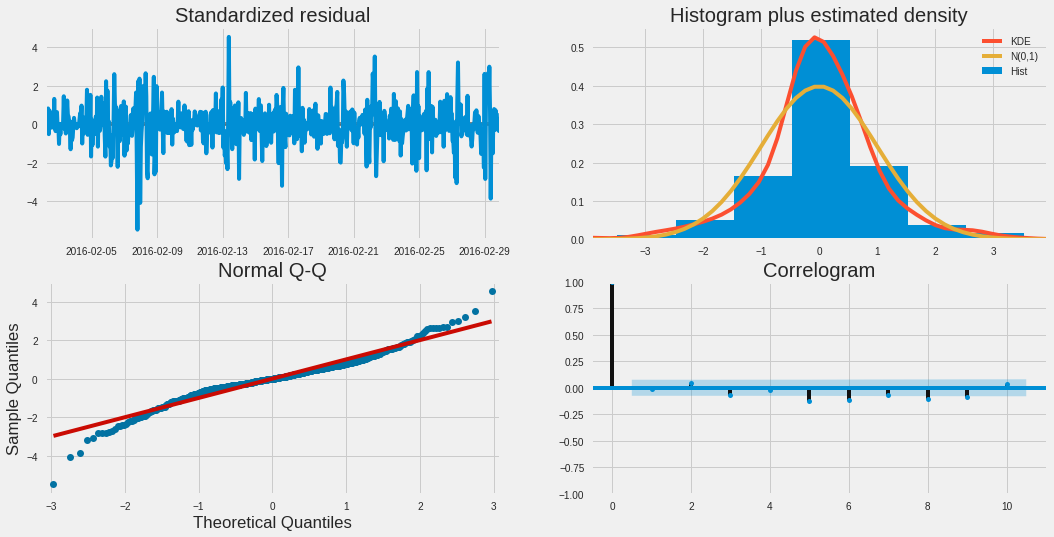

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = False 155.58


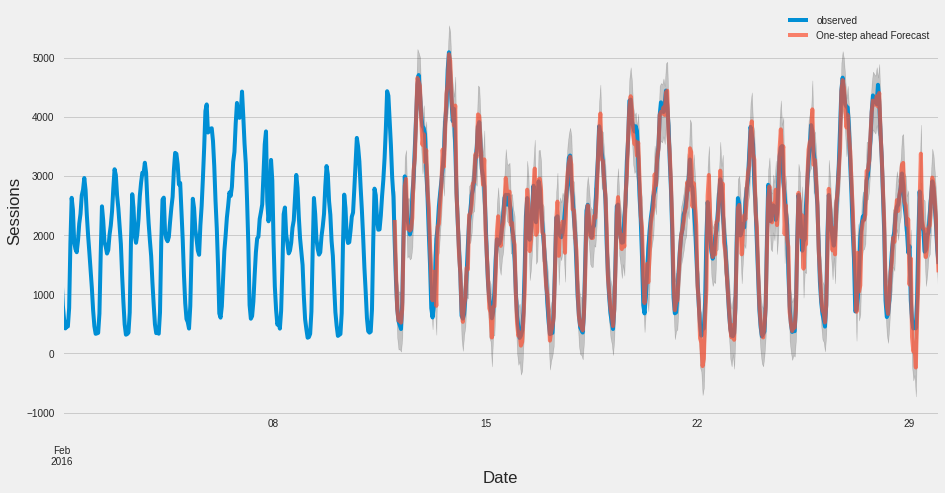

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = True 560.46


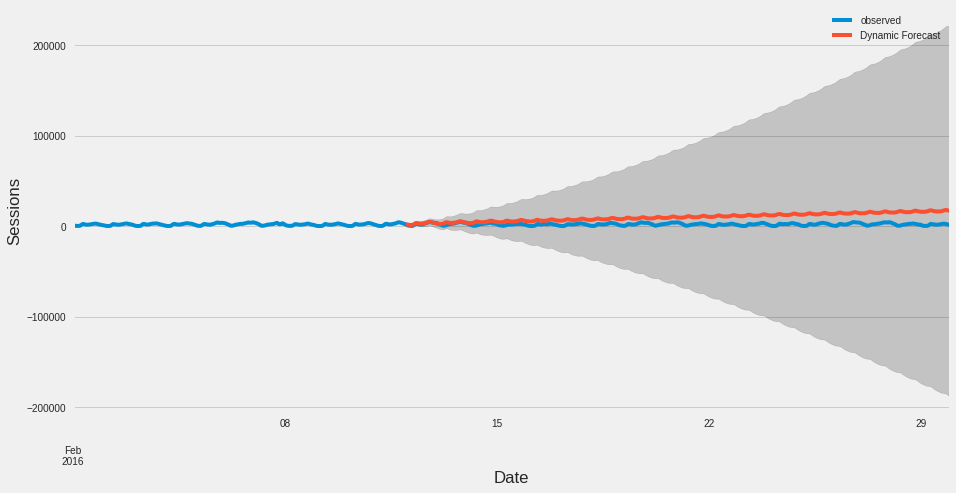

In [91]:
model = sarima_eva(y,(2, 1, 0),(1, 1, 0, 12),12,'2016-02-12',y_to_val)